In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('Dataset.csv')
dataset

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
dataset = dataset.dropna(axis=0)

In [5]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
LabelEncoder = LabelEncoder()
dataset['Cuisines_encoded'] = LabelEncoder.fit_transform(dataset['Cuisines'].astype(str))
dataset.fillna(dataset.median(numeric_only=True), inplace=True)
selected_features = ['Cuisines_encoded', 'Price range', 'Votes']
X = dataset[selected_features]
y = dataset['Aggregate rating']
print(X.head(), y.head())

   Cuisines_encoded  Price range  Votes
0               920            3    314
1              1111            3    591
2              1671            4    270
3              1126            4    365
4              1122            4    229 0    4.8
1    4.5
2    4.4
3    4.9
4    4.8
Name: Aggregate rating, dtype: float64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (7633, 3) (7633,)
Testing set shape (X_test, y_test): (1909, 3) (1909,)


In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Knn": KNeighborsRegressor(),
    "Gb": GradientBoostingRegressor(),
    "Elastic": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Svr": SVR()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("---------------------------")



Model: Linear Regression
Mean Squared Error: 1.712720481887327
R-squared: 0.25209764254176503
---------------------------
Model: Decision Tree
Mean Squared Error: 0.2167801065971076
R-squared: 0.9053375291014414
---------------------------
Model: Random Forest
Mean Squared Error: 0.13132708678567537
R-squared: 0.9426527335640339
---------------------------
Model: Knn
Mean Squared Error: 0.2287882661079099
R-squared: 0.9000938650582772
---------------------------
Model: Gb
Mean Squared Error: 0.11101798687871357
R-squared: 0.9515212114382132
---------------------------
Model: Elastic
Mean Squared Error: 1.7286088813502418
R-squared: 0.2451595743980024
---------------------------
Model: Svr
Mean Squared Error: 1.891070132653347
R-squared: 0.1742167941077154
---------------------------



Distribution of Ratings:


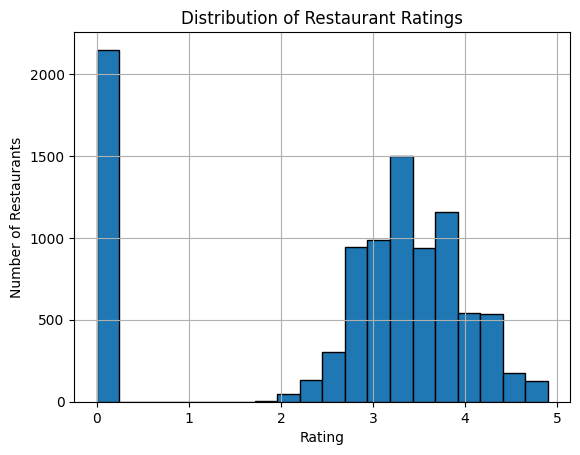

In [9]:
print("\nDistribution of Ratings:")
dataset['Aggregate rating'].hist(bins=20, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurant Ratings')
plt.show()

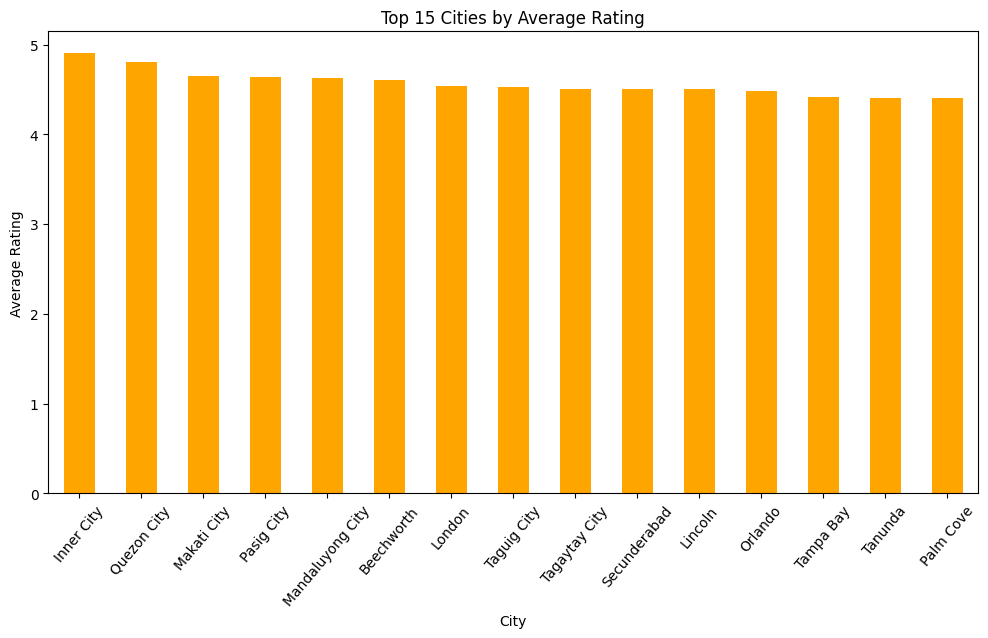

In [10]:
city_ratings = dataset.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 6))
city_ratings.plot(kind='bar', color='orange')
plt.title('Top 15 Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=50)
plt.show()

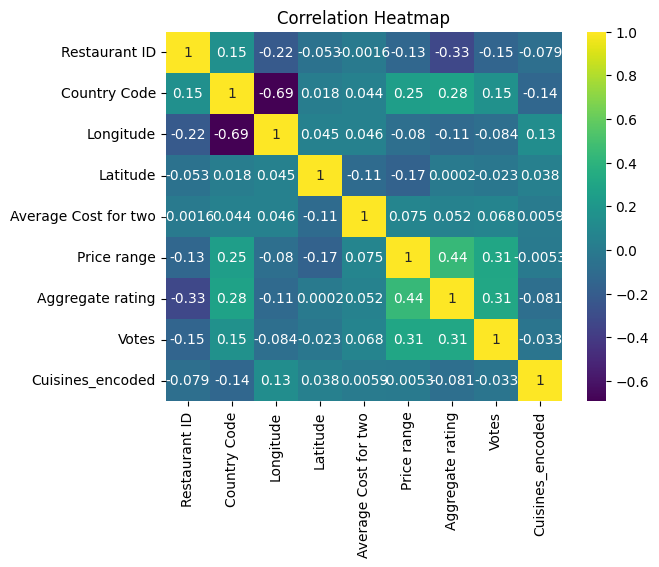

In [11]:
numeric_data = dataset.select_dtypes(include=[np.number])
corr = numeric_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

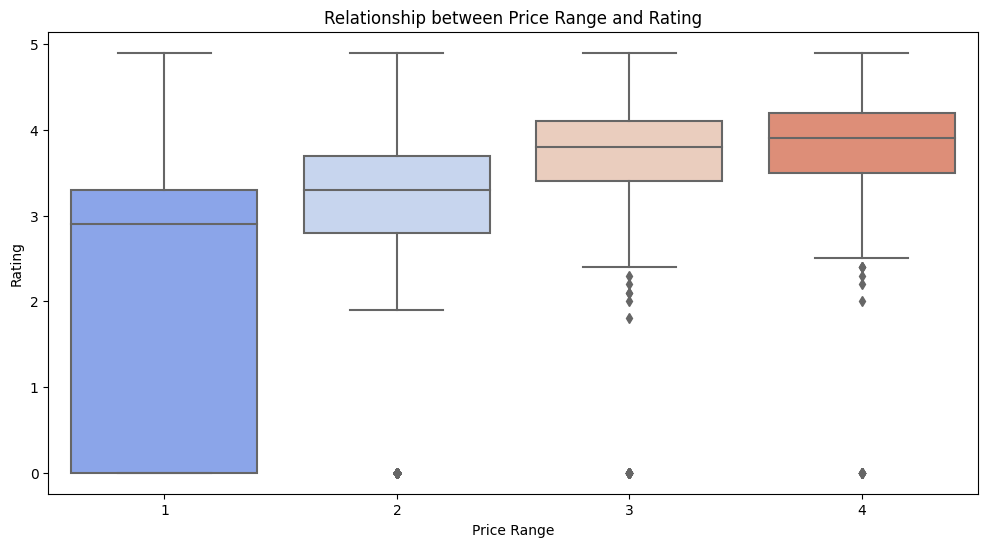

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=dataset, palette='coolwarm')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.title('Relationship between Price Range and Rating')
plt.show()

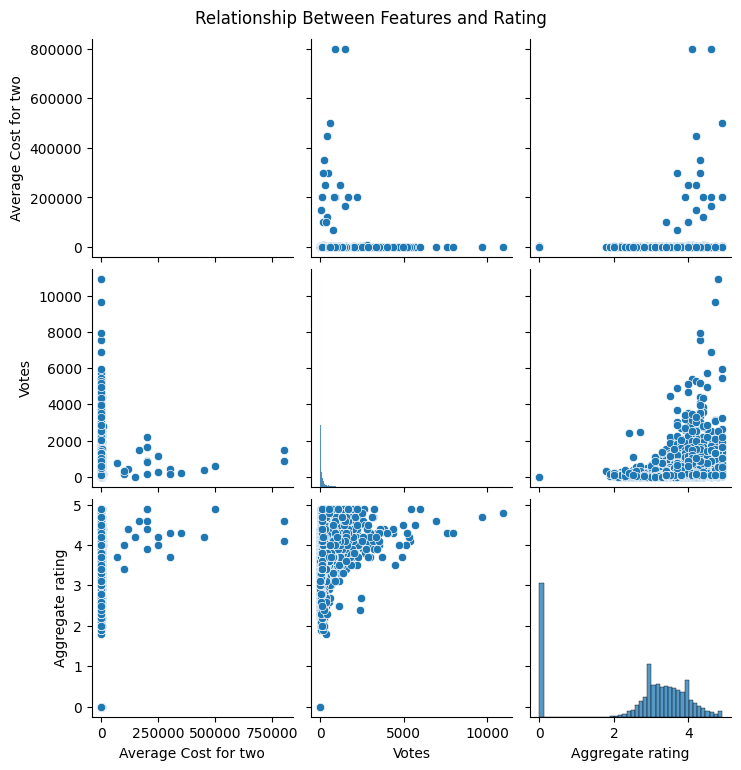

In [13]:
sns.pairplot(data=dataset, vars=['Average Cost for two', 'Votes', 'Aggregate rating'])
plt.suptitle("Relationship Between Features and Rating", y=1.02)
plt.show()

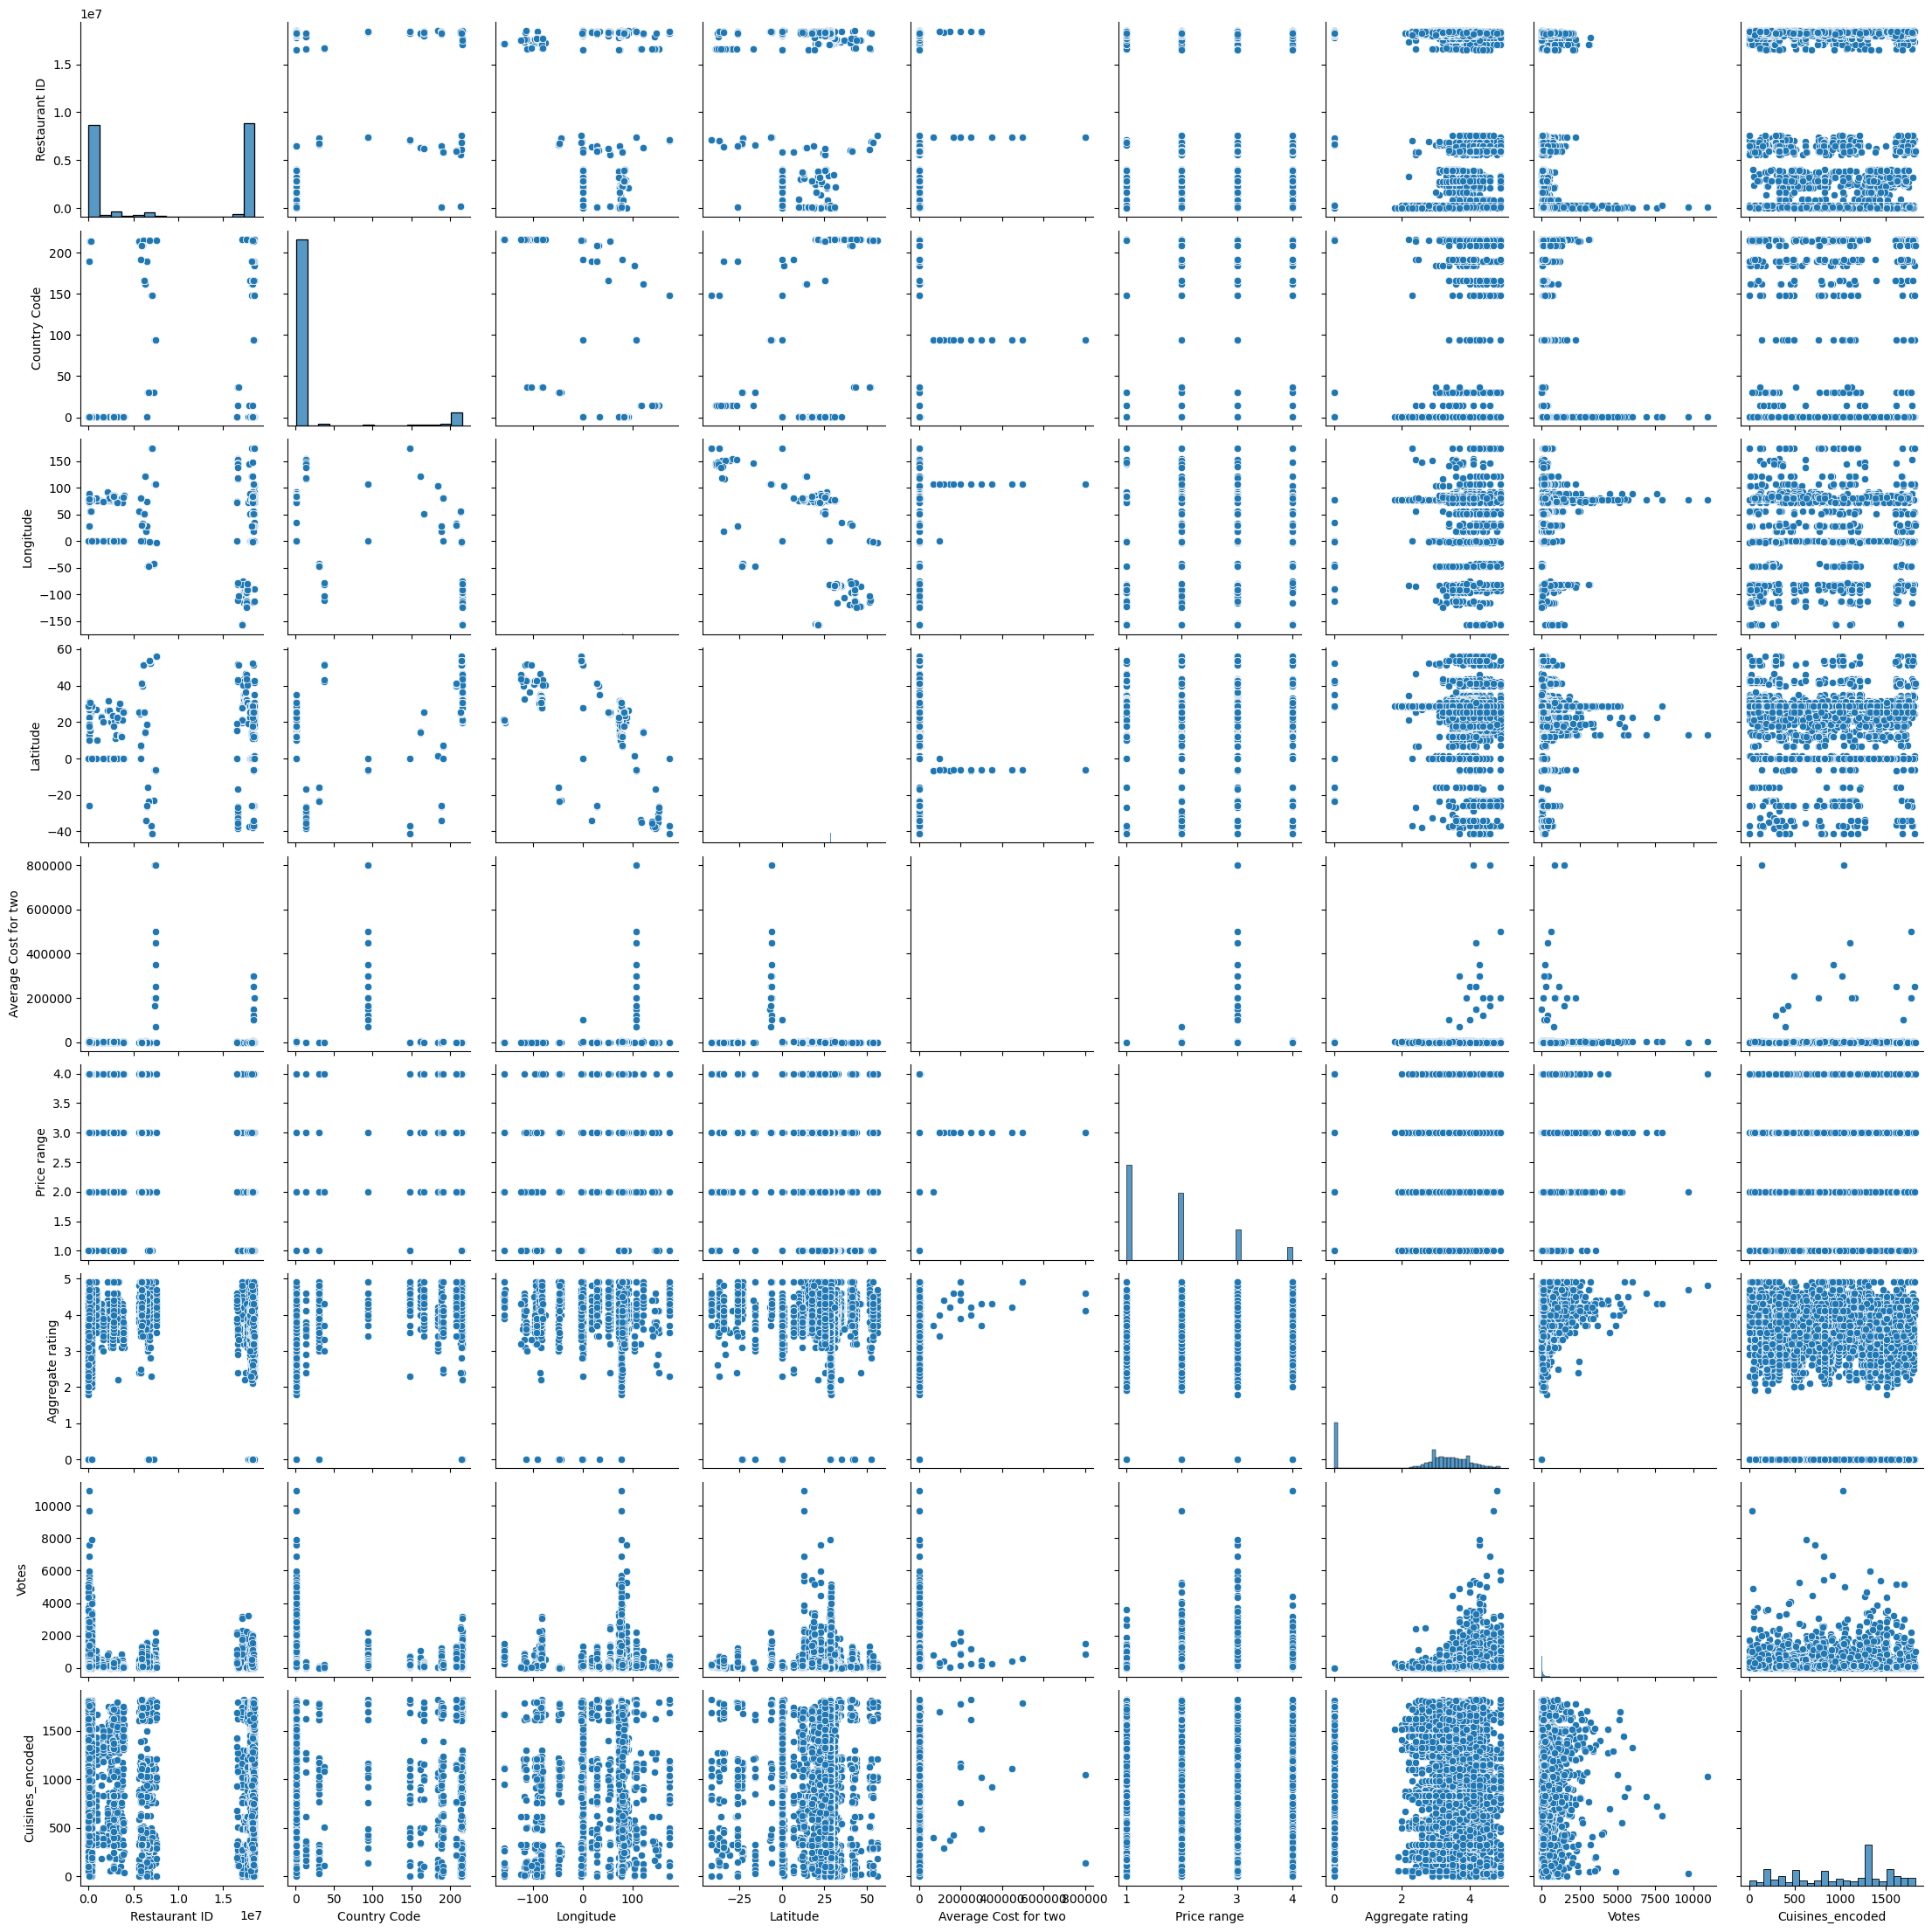

In [14]:
sns.pairplot(dataset)
plt.show()

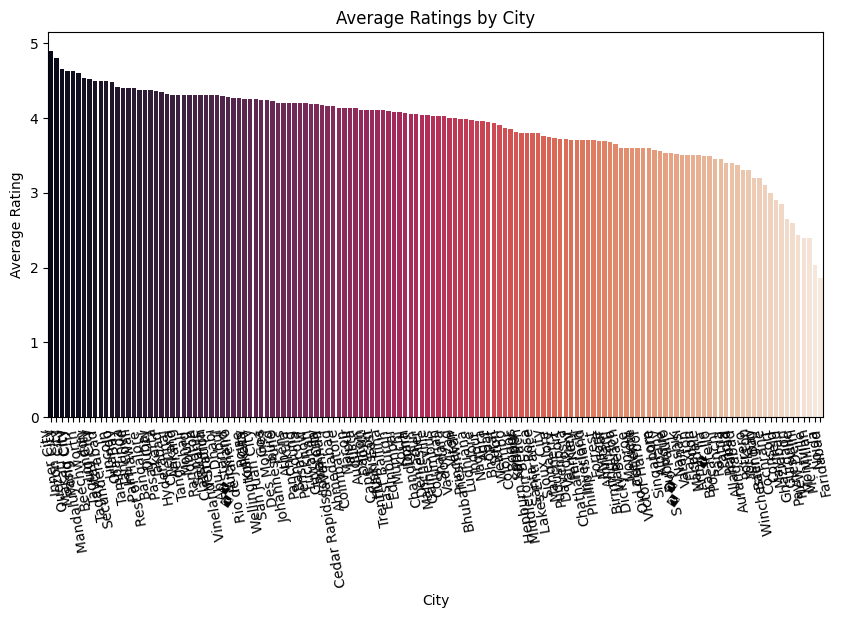

In [15]:
plt.figure(figsize=(10, 5))
average_ratings_by_city = dataset.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
sns.barplot(x=average_ratings_by_city.index, y=average_ratings_by_city.values, palette='rocket')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Ratings by City')
plt.xticks(rotation=100)
plt.show()